Scikit-Learn коэффициенты:
Intercept: 152.28824927379569
Coefficient: 981.6554361411928

Собственные коэффициенты:
Intercept: 152.28824927379574
Coefficient: 981.6554361411926



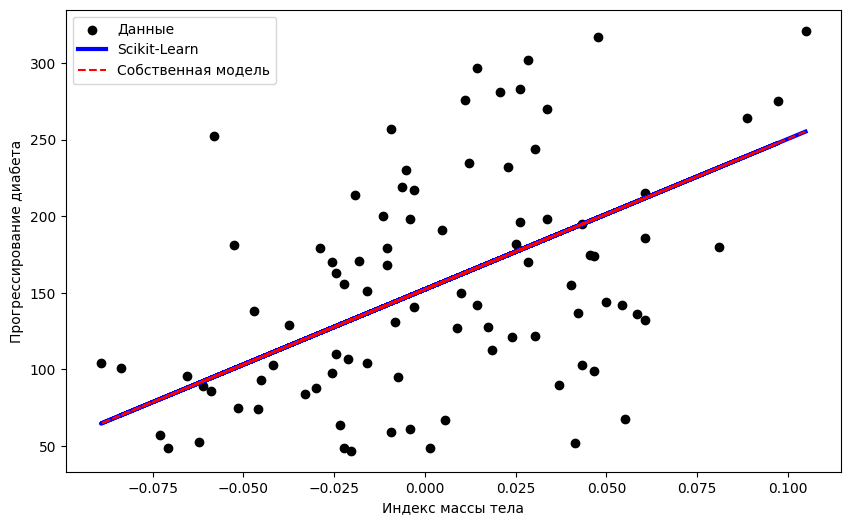

   Фактическое  Scikit-Learn  Собственная модель
0        321.0    255.174269          255.174269
1        215.0    211.794626          211.794626
2        127.0    161.008702          161.008702
3         64.0    129.267499          129.267499
4        175.0    196.982065          196.982065
5        275.0    247.767988          247.767988
6        179.0    123.977299          123.977299
7        232.0    174.763223          174.763223
8        142.0    205.446385          205.446385
9         99.0    198.040105          198.040105


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


diabetes = datasets.load_diabetes()
X = diabetes.data[:, 2].reshape(-1, 1)  # Используем индекс массы тела (3-й признак)
y = diabetes.target

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Линейная регрессия с помощью Scikit-Learn
sklearn_reg = LinearRegression()
sklearn_reg.fit(X_train, y_train)
sklearn_pred = sklearn_reg.predict(X_test)

# Собственная реализация линейной регрессии
# Добавляем столбец единиц для intercept
X_train_with_intercept = np.c_[np.ones(X_train.shape[0]), X_train]

# Вычисляем коэффициенты: theta = (X^T X)^-1 X^T y
theta = np.linalg.inv(X_train_with_intercept.T @ X_train_with_intercept) @ X_train_with_intercept.T @ y_train

# Предсказания собственной модели
X_test_with_intercept = np.c_[np.ones(X_test.shape[0]), X_test]
custom_pred = X_test_with_intercept @ theta

# Вывод коэффициентов
print("Scikit-Learn коэффициенты:")
print(f"Intercept: {sklearn_reg.intercept_}")
print(f"Coefficient: {sklearn_reg.coef_[0]}\n")

print("Собственные коэффициенты:")
print(f"Intercept: {theta[0]}")
print(f"Coefficient: {theta[1]}\n")

# Визуализация данных и регрессионных прямых
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='black', label='Данные')
plt.plot(X_test, sklearn_pred, color='blue', linewidth=3, label='Scikit-Learn')
plt.plot(X_test, custom_pred, color='red', linestyle='dashed', label='Собственная модель')
plt.xlabel('Индекс массы тела')
plt.ylabel('Прогрессирование диабета')
plt.legend()
plt.show()

# Таблица предсказаний
import pandas as pd
df = pd.DataFrame({
    'Фактическое': y_test,
    'Scikit-Learn': sklearn_pred,
    'Собственная модель': custom_pred
})
print(df.head(10))

